# Module 6 - Clustering for Diversification Analysis 

Clustering is a method of unsupervised learning and is a common
technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re
import glob
from matplotlib import cm
import random

## Problem Statements

## Query 6.1 

Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [2]:
def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    #dataframe = dataframe.rename(lambda x: re.sub(r'%', 'Percent', x).replace('.', '').replace(' ', '_'), axis=1)
    dataframe = dataframe[dataframe.Series == 'EQ']
    dataframe.set_index(dataframe.Date, inplace=True )
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)

def getCap( filename ):
    return re.sub(r'^.*/(\w+_Cap)/.*$', '\\1', filename)

In [3]:
filenames = glob.glob('data/**/*.csv')
filenames_all=[]
for i in filenames:
    l=i.split('\\')
    filenames_all.append('/'.join(l))

portfolio_caps_seen = { getCap(filename): 0 for filename in filenames_all }

portfolio = DataFrame()
for filename in filenames_all:
    if  portfolio_caps_seen[ getCap(filename) ] < 10:
        portfolio_caps_seen[ getCap(filename) ] += 1
        portfolio[ getName(filename) ] = read_csv(filename)["Close Price"]

print('portfolio.shape:          ', portfolio.shape)
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)
portfolio

portfolio.shape:           (494, 30)
portfolio.shape.dropna():  (131, 30)


,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,GUJALKALI,IDFC,IRCON,ITDC,JETAIRWAYS
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,356.20,1148.05,500.10,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,216.05,341.15,82.20,266.65,205.25,457.35,63.70,NaN,650.15,527.50
2017-05-16,354.50,1142.85,501.50,1347.75,733.30,565.60,2724.10,29362.50,411.40,1566.55,...,214.90,347.00,83.40,266.10,207.90,455.25,64.25,NaN,636.70,534.15
2017-05-17,348.55,1154.95,502.80,1324.80,727.45,562.35,2736.90,29093.55,408.30,1552.50,...,217.00,349.85,82.25,264.85,205.90,472.65,63.35,NaN,626.75,528.90
2017-05-18,347.90,1151.35,492.00,1314.55,714.90,560.10,2678.95,28357.30,404.75,1537.05,...,209.65,334.10,78.95,260.35,196.85,461.85,61.50,NaN,604.65,522.70
2017-05-19,349.45,1123.15,501.70,1289.15,702.45,564.95,2656.45,27936.05,401.05,1520.60,...,206.25,336.20,77.15,254.05,203.55,455.35,61.15,NaN,594.30,520.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,371.90,1387.80,741.85,3017.05,378.85,557.95,2942.45,20353.20,340.75,1966.30,...,118.10,557.75,121.45,163.15,135.20,545.85,37.10,398.20,254.30,127.30
2019-05-08,369.80,1385.70,735.50,2921.30,379.80,558.00,2900.50,20336.55,337.50,1930.75,...,115.45,534.45,119.35,161.30,133.60,522.90,37.60,394.30,251.95,131.35
2019-05-09,363.90,1354.20,731.00,2971.35,368.05,557.75,2900.60,20360.90,340.40,1914.60,...,115.30,531.85,117.75,160.50,133.00,510.10,37.60,399.95,246.25,147.40


## Query 6.2 

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [4]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.04404404, 0.02902903, 0.03503504, 0.05805806, 0.05205205,
       0.05605606, 0.02102102, 0.003003  , 0.05205205, 0.06106106,
       0.05605606, 0.00800801, 0.01501502, 0.03303303, 0.00500501,
       0.04204204, 0.03403403, 0.04504505, 0.00900901, 0.00600601,
       0.03103103, 0.03703704, 0.01501502, 0.02902903, 0.03403403,
       0.03003003, 0.02602603, 0.04304304, 0.03203203, 0.05805806])

In [5]:
working_days_per_year    = 252
portfolio_summary = DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,returns,volatility
ADANIPORTS,0.060499,0.309751
ASIANPAINT,0.097990,0.209462
AXISBANK,0.233194,0.277917
BAJFINANCE,0.454332,0.321058
BPCL,-0.261420,0.436424
CIPLA,0.011817,0.254457
DRREDDY,0.068044,0.298319
EICHERMOT,-0.176484,0.300184
GAIL,-0.052551,0.338425
HDFC,0.137945,0.214557


## Query 6.3 

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

### Elbow Curves

Text(0, 0.5, 'inertia - % change')

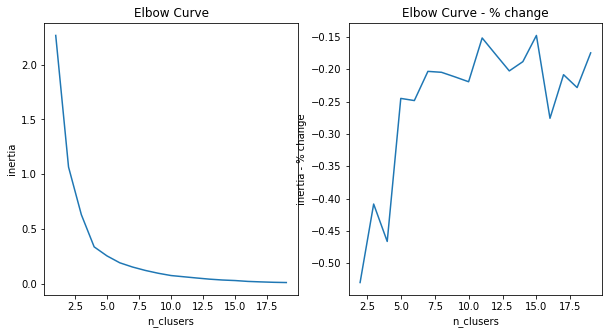

In [6]:
elbow_curve = [ None ] + [ sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(portfolio_summary).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot( elbow_curve )
axes[0].set_title('Elbow Curve')    
axes[0].set_xlabel('n_clusers')
axes[0].set_ylabel('inertia')

axes[1].plot( Series(elbow_curve).pct_change() )
axes[1].set_title('Elbow Curve - % change')    
axes[1].set_xlabel('n_clusers')
axes[1].set_ylabel('inertia - % change')

From the above charts, the first major elbow happens at n=5 clusters, though there is a second elbow at n=9 clusters

In [7]:
elbow_curve_select = [5,9]

### K-Means Clustering

In [8]:
cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC38188448>


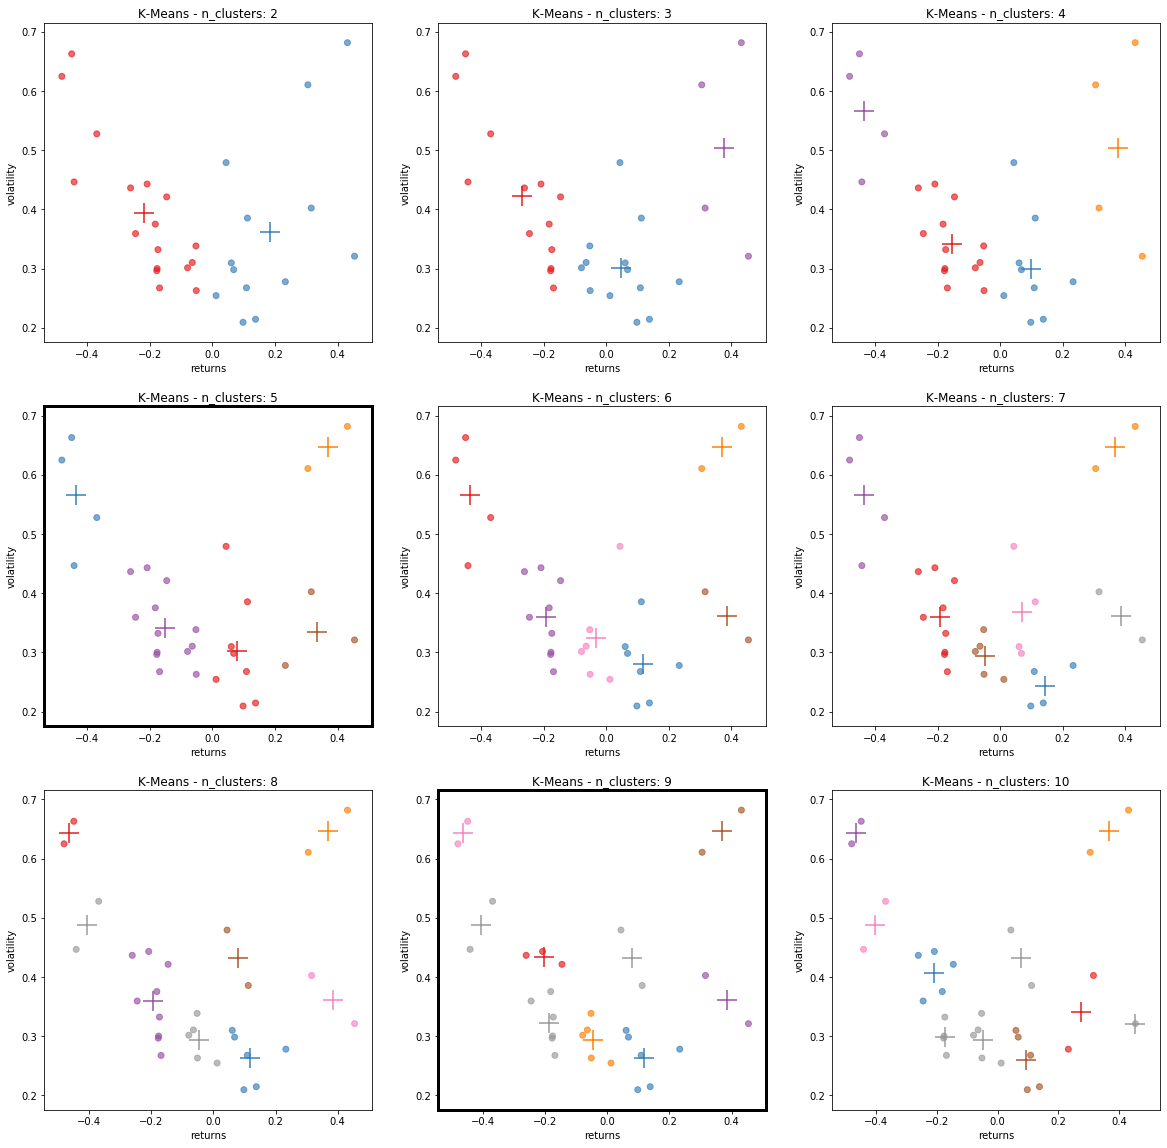

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
fig, axes = plt.subplots(3,3, figsize=(20,20))

print(axes)
portfolio_kmeans = {}
for x in range(0,len(axes)):
    for y in range(0,len(axes[0])):
        n = 2 + (len(axes[0]) * x) + y
        portfolio_kmeans[n]      = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(portfolio_summary)
        portfolio_kmeans_predict = portfolio_kmeans[n].predict(portfolio_summary)

        axes[x][y].scatter( portfolio_summary.returns, portfolio_summary.volatility, c=get_color(portfolio_kmeans_predict), alpha=0.66 )
        axes[x][y].set_title('K-Means - n_clusters: ' + str(n))
        axes[x][y].set_xlabel('returns')
        axes[x][y].set_ylabel('volatility')
        
        # Mark Cluster Centers
        for i, coords in enumerate( portfolio_kmeans[n].cluster_centers_ ):
           axes[x][y].scatter( coords[0], coords[1], s=400, marker='+', c=[ get_color(i) ] )
        
        # Add thick borders to n_clusters selected by elbow_curve
        if n in elbow_curve_select:
            for spine in axes[x][y].spines.values(): spine.set_linewidth(3) 

## Query 6.4 

Prepare a separate Data frame to show which stocks belong to the same cluster 

In [11]:
for n in elbow_curve_select:
    portfolio_summary['cluster_'+str(n)] = portfolio_kmeans[n].predict( portfolio_summary[['returns', 'volatility']] )
portfolio_summary

,returns,volatility,cluster_5,cluster_9
ADANIPORTS,0.060499,0.309751,0,1
ASIANPAINT,0.097990,0.209462,0,1
AXISBANK,0.233194,0.277917,4,1
BAJFINANCE,0.454332,0.321058,4,2
BPCL,-0.261420,0.436424,2,0
CIPLA,0.011817,0.254457,0,3
DRREDDY,0.068044,0.298319,0,1
EICHERMOT,-0.176484,0.300184,2,7
GAIL,-0.052551,0.338425,2,3
HDFC,0.137945,0.214557,0,1
